# Exploration des données simulées
Ce notebook sert à :
- Charger et inspecter les données brutes
- Visualiser les séries temporelles et repérer les anomalies
- Charger les fenêtres traitées et vérifier leur format

## 1. Chargement des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Chargement et aperçu des données brutes

In [3]:
df = pd.read_csv('/home/arnaud/Documents/predictive_maintenance/data/raw/simulated_data.csv', parse_dates=['timestamp'])
print(df.shape)
df.head()

(18000, 5)


,timestamp,temperature_C,vibration_g,current_A,pressure_bar
0,2025-08-01 15:25:16.956437,60.860165,0.213195,4.881391,2.938624
1,2025-08-01 15:25:17.056437,60.259772,0.214275,4.937108,2.958611
2,2025-08-01 15:25:17.156437,59.820534,0.183566,4.871592,3.040167
3,2025-08-01 15:25:17.256437,59.924988,0.167444,5.068063,3.066105
4,2025-08-01 15:25:17.356437,60.559637,0.117112,5.019233,2.979028


## 3. Statistiques descriptives

In [4]:
df[['temperature_C', 'vibration_g', 'current_A', 'pressure_bar']].describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_C,18000.0,60.515431,1.476303,58.127137,59.718025,60.096477,60.568144,71.885710
vibration_g,18000.0,0.203451,0.090098,-0.040632,0.166391,0.199352,0.233846,2.235862
current_A,18000.0,5.190558,0.912629,4.599866,4.937060,5.007120,5.080917,17.301751
pressure_bar,18000.0,2.997710,0.108291,1.897719,2.930694,2.998611,3.067398,3.387236


## 4. Visualisation des séries temporelles

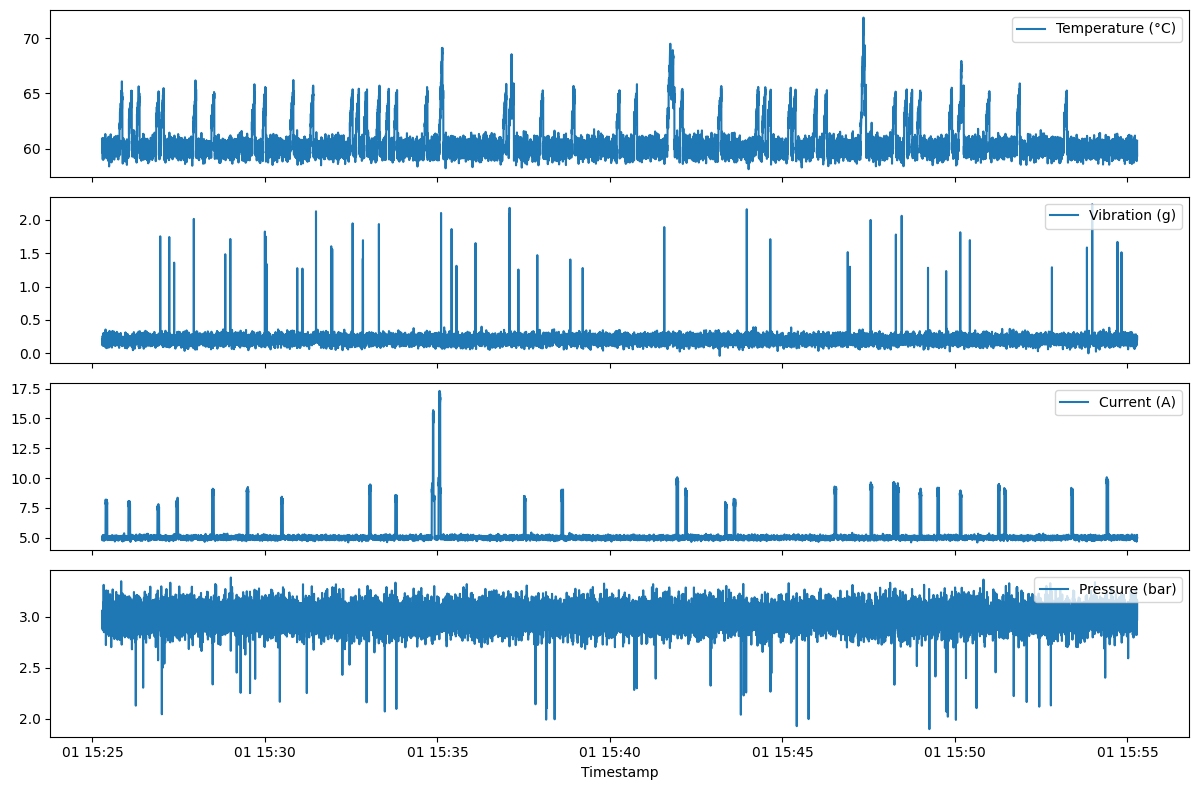

In [5]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))
axes[0].plot(df['timestamp'], df['temperature_C'], label='Temperature (°C)')
axes[1].plot(df['timestamp'], df['vibration_g'], label='Vibration (g)')
axes[2].plot(df['timestamp'], df['current_A'], label='Current (A)')
axes[3].plot(df['timestamp'], df['pressure_bar'], label='Pressure (bar)')
for ax in axes:
    ax.legend(loc='upper right')
plt.xlabel('Timestamp')
plt.tight_layout()

## 5. Prémière détection d'anomalies (méthode 3-sigma)

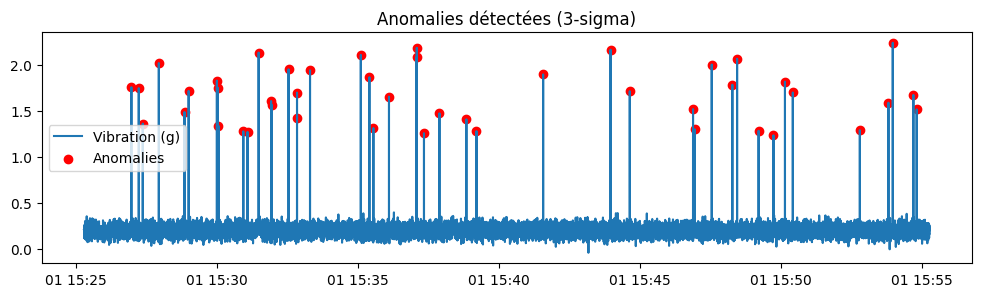

In [6]:
# On marque anomalies où |z-score| > 3
for col in ['temperature_C', 'vibration_g', 'current_A', 'pressure_bar']:
    z = (df[col] - df[col].mean()) / df[col].std()
    df[f'{col}_anomaly'] = np.abs(z) > 3

# Exemple : tracer anomalies sur la vibration
mask = df['vibration_g_anomaly']
plt.figure(figsize=(12, 3))
plt.plot(df['timestamp'], df['vibration_g'], label='Vibration (g)')
plt.scatter(df['timestamp'][mask], df['vibration_g'][mask], color='red', label='Anomalies')
plt.legend()
plt.title('Anomalies détectées (3-sigma)')
plt.show()

## 6. Chargement des fenêtres pré-traitées

In [7]:
windows = np.load('/home/arnaud/Documents/predictive_maintenance/data/processed/windows.npy')
print('Shape des fenêtres :', windows.shape)
# (n_windows, windows_size, n_features)

Shape des fenêtres : (1791, 100, 4)


## 7. Visualisation de quelques fenêtres


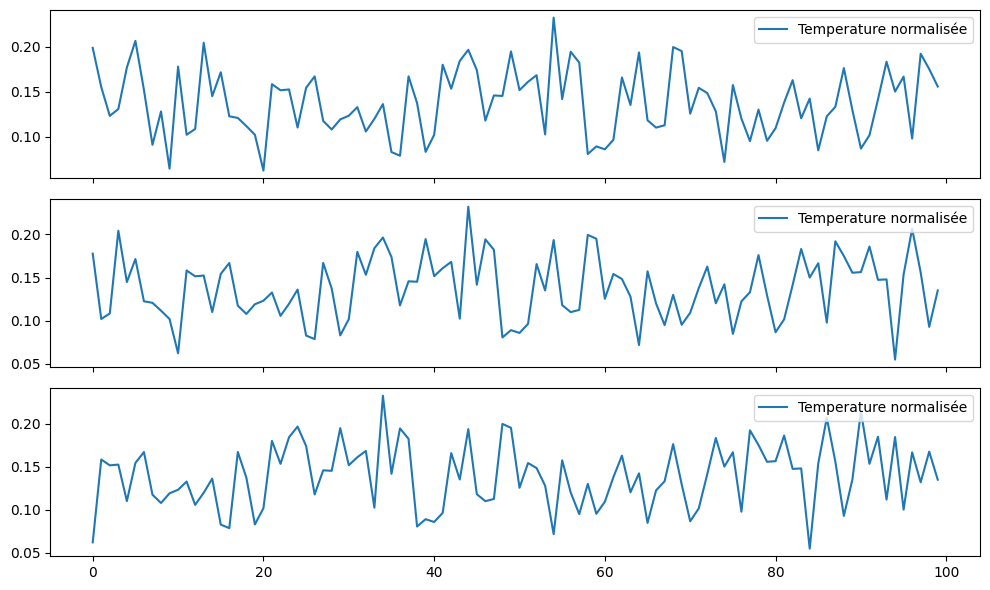

In [8]:
n_show = 3
fig, axes = plt.subplots(n_show, 1, figsize=(10, 6), sharex=True)
for i in range(n_show):
    axes[i].plot(windows[i, :, 0],label='Temperature normalisée')
    axes[i].legend(loc='upper right')
plt.tight_layout()